### IMPORT IMPORTANT LIBARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORT DATASET

In [2]:
supply_chain=pd.read_csv("C:\\Users\\HomePC\\Desktop\\supply chain dataset\\supply_chain_data.csv")
supply_chain

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


### Rename Confusing Columns

In [3]:
supply_chain=supply_chain.rename(columns={
    "SKU": "Product_ID",
    "Stock levels": "Inventory",
    "Number of products sold": "Demand",
    "Shipping costs": "Shipping_Cost",
    "Manufacturing costs": "Manufacturing_Cost",
    "Lead time": "Supplier_Lead_Time",
    "Lead times": "Shipping_Lead_Time",
    "Manufacturing lead time": "Manufacturing_Lead_Time",
    "Order quantities": "Order_Quantity"
})


### Drop Irrelevant or Noisy Columns

In [4]:
supply_chain.drop(columns=[
    "Customer demographics", 
    "Inspection results", 
    "Transportation modes", 
    "Routes"
], inplace=True)


In [5]:
supply_chain.head()

,Product type,Product_ID,Price,Availability,Demand,Revenue generated,Inventory,Shipping_Lead_Time,Order_Quantity,Shipping times,Shipping carriers,Shipping_Cost,Supplier name,Location,Supplier_Lead_Time,Production volumes,Manufacturing_Lead_Time,Manufacturing_Cost,Defect rates,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,0.226410,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,4.854068,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,4.580593,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,4.746649,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,3.145580,923.440632


In [6]:
supply_chain.shape

(100, 20)

### EDITED TO MY LOCATION OF MY COUNTRY FOR BETTER UNDERSTANDING

In [7]:
supply_chain['Location'] = supply_chain['Location'].replace({
    "Mumbai": "Nairobi",
    "Kolkata": "Kisumu",
    "Delhi": "Mombasa",
    "Bangalore":"Nyeri",
    "Chennai":"Nakuru"
    
})


In [8]:
supply_chain['Location'].unique()

array(['Nairobi', 'Kisumu', 'Mombasa', 'Nyeri', 'Nakuru'], dtype=object)

In [9]:
supply_chain.head()

,Product type,Product_ID,Price,Availability,Demand,Revenue generated,Inventory,Shipping_Lead_Time,Order_Quantity,Shipping times,Shipping carriers,Shipping_Cost,Supplier name,Location,Supplier_Lead_Time,Production volumes,Manufacturing_Lead_Time,Manufacturing_Cost,Defect rates,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,58,7,96,4,Carrier B,2.956572,Supplier 3,Nairobi,29,215,29,46.279879,0.226410,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,53,30,37,2,Carrier A,9.716575,Supplier 3,Nairobi,23,517,30,33.616769,4.854068,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,1,10,88,2,Carrier B,8.054479,Supplier 1,Nairobi,12,971,27,30.688019,4.580593,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,23,13,59,6,Carrier C,1.729569,Supplier 5,Kisumu,24,937,18,35.624741,4.746649,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,5,3,56,8,Carrier A,3.890548,Supplier 1,Mombasa,5,414,3,92.065161,3.145580,923.440632


### REMOVE DUPLICATES

In [10]:
supply_chain.drop_duplicates(inplace=True)

### CHECK FOR NULL VALUES

In [11]:
print(supply_chain.isnull().sum())


Product type               0
Product_ID                 0
Price                      0
Availability               0
Demand                     0
Revenue generated          0
Inventory                  0
Shipping_Lead_Time         0
Order_Quantity             0
Shipping times             0
Shipping carriers          0
Shipping_Cost              0
Supplier name              0
Location                   0
Supplier_Lead_Time         0
Production volumes         0
Manufacturing_Lead_Time    0
Manufacturing_Cost         0
Defect rates               0
Costs                      0
dtype: int64


### CONVERT TYPES

In [12]:
supply_chain['Location'] = supply_chain['Location'].astype('category')

In [13]:
supply_chain

,Product type,Product_ID,Price,Availability,Demand,Revenue generated,Inventory,Shipping_Lead_Time,Order_Quantity,Shipping times,Shipping carriers,Shipping_Cost,Supplier name,Location,Supplier_Lead_Time,Production volumes,Manufacturing_Lead_Time,Manufacturing_Cost,Defect rates,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,58,7,96,4,Carrier B,2.956572,Supplier 3,Nairobi,29,215,29,46.279879,0.226410,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,53,30,37,2,Carrier A,9.716575,Supplier 3,Nairobi,23,517,30,33.616769,4.854068,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,1,10,88,2,Carrier B,8.054479,Supplier 1,Nairobi,12,971,27,30.688019,4.580593,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,23,13,59,6,Carrier C,1.729569,Supplier 5,Kisumu,24,937,18,35.624741,4.746649,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,5,3,56,8,Carrier A,3.890548,Supplier 1,Mombasa,5,414,3,92.065161,3.145580,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,15,14,26,9,Carrier B,8.630339,Supplier 4,Nairobi,18,450,26,58.890686,1.210882,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,67,2,32,3,Carrier C,5.352878,Supplier 3,Nairobi,28,648,28,17.803756,3.872048,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,46,19,4,9,Carrier A,7.904846,Supplier 4,Nairobi,10,535,13,65.765156,3.376238,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,53,1,27,7,Carrier B,1.409801,Supplier 5,Nakuru,28,581,9,5.604691,2.908122,882.198864


### Exploratory Data Analysis (EDA)

In [14]:
###Summary Statistics
supply_chain.describe()


,Price,Availability,Demand,Revenue generated,Inventory,Shipping_Lead_Time,Order_Quantity,Shipping times,Shipping_Cost,Supplier_Lead_Time,Production volumes,Manufacturing_Lead_Time,Manufacturing_Cost,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [15]:
###Top Products by Demand 
supply_chain.groupby('Product type')['Demand'].sum().sort_values(ascending=False).head()


Product type
skincare     20731
haircare     13611
cosmetics    11757
Name: Demand, dtype: int64

In [16]:
###Top Products by Revenue
supply_chain.groupby('Product type')['Revenue generated'].sum().sort_values(ascending=False).head()

Product type
skincare     241628.162133
haircare     174455.390605
cosmetics    161521.265999
Name: Revenue generated, dtype: float64

### Cost Analysis

In [17]:
###Total Cost per Product
supply_chain['Total_Cost'] = supply_chain['Manufacturing_Cost'] + supply_chain['Shipping_Cost']
supply_chain.groupby('Product type')['Total_Cost'].sum().sort_values(ascending=False).head()


Product type
skincare     2156.113805
haircare     1848.435511
cosmetics    1276.934916
Name: Total_Cost, dtype: float64

In [18]:
### Cost by Supplier
supply_chain.groupby('Supplier name')['Total_Cost'].mean().sort_values()


Supplier name
Supplier 2    47.361692
Supplier 3    48.422892
Supplier 5    50.558075
Supplier 1    50.766329
Supplier 4    68.469300
Name: Total_Cost, dtype: float64

### Lead Time Analysis

In [19]:
### Compare Lead Time vs Cost:
supply_chain[['Supplier_Lead_Time', 'Total_Cost']].corr()


,Supplier_Lead_Time,Total_Cost
Supplier_Lead_Time,1.000000,-0.118724
Total_Cost,-0.118724,1.000000


### Location-Based Insights

In [20]:
##Inventory by Location:
supply_chain.groupby('Location')['Inventory'].mean()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_5904\1034267835.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  supply_chain.groupby('Location')['Inventory'].mean()


Location
Kisumu     57.560000
Mombasa    50.066667
Nairobi    42.363636
Nakuru     39.950000
Nyeri      47.555556
Name: Inventory, dtype: float64

In [21]:
### Demand by Location
supply_chain.groupby('Location')['Demand'].sum().sort_values(ascending=False).head()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_5904\2741683832.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  supply_chain.groupby('Location')['Demand'].sum().sort_values(ascending=False).head()


Location
Kisumu     12770
Mombasa     9715
Nairobi     9426
Nakuru      8768
Nyeri       5420
Name: Demand, dtype: int64

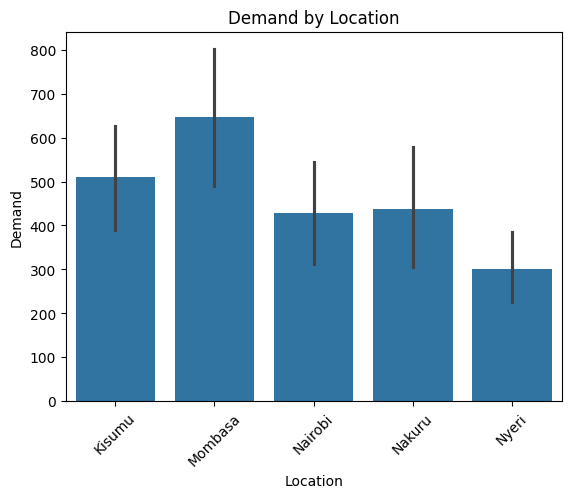

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Location', y='Demand', data=supply_chain)
plt.title("Demand by Location")
plt.xticks(rotation=45)
plt.show()


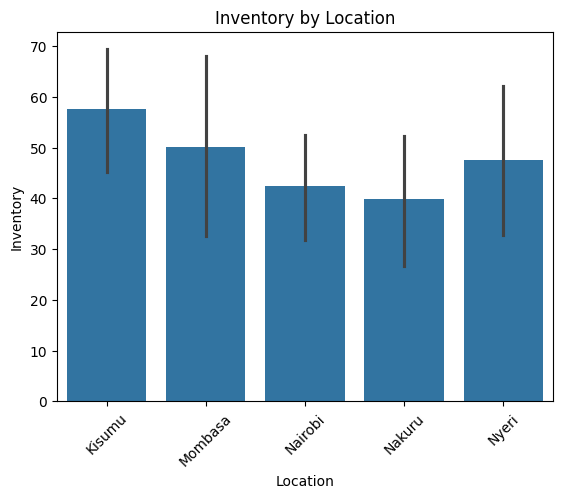

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Location', y='Inventory', data=supply_chain)
plt.title("Inventory by Location")
plt.xticks(rotation=45)
plt.show()

In [24]:
pip install pulp


Note: you may need to restart the kernel to use updated packages.


### Setup Model

In [25]:
from pulp import *

# Step 1: Initialize the problem
model = LpProblem("SupplyChainOptimization", LpMinimize)

# Step 2: Create sets
products = supply_chain['Product_ID'].unique()

# Step 3: Define decision variables: how many units to order for each product
order_qty = LpVariable.dicts("OrderQty", products, lowBound=0, cat='Continuous')


### Define the Objective Function (Minimize Cost)

In [26]:
# Create dictionaries for cost and demand
cost_dict = supply_chain.groupby('Product_ID')['Manufacturing_Cost'].mean().to_dict()
shipping_dict = supply_chain.groupby('Product_ID')['Shipping_Cost'].mean().to_dict()
holding_cost_per_unit = 0.75  # Example flat holding cost

# Objective: total cost = manufacturing + shipping + holding
model += lpSum([
    order_qty[p] * (cost_dict[p] + shipping_dict[p] + holding_cost_per_unit)
    for p in products
])


### Add Constraints

In [27]:
# Demand and inventory as constraints
demand_dict = supply_chain.groupby('Product_ID')['Demand'].sum().to_dict()
inventory_dict = supply_chain.groupby('Product_ID')['Inventory'].sum().to_dict()

for p in products:
    model += order_qty[p] >= demand_dict[p], f"Demand_Constraint_{p}"
    model += order_qty[p] <= inventory_dict[p], f"Inventory_Constraint_{p}"


In [28]:
model.solve()
print(f"Status: {LpStatus[model.status]}")

# Print optimal order quantities
for p in products:
    print(f"{p}: Order {order_qty[p].varValue:.2f} units")


Status: Infeasible
SKU0: Order 802.00 units
SKU1: Order 736.00 units
SKU2: Order 0.00 units
SKU3: Order 0.00 units
SKU4: Order 871.00 units
SKU5: Order 0.00 units
SKU6: Order 0.00 units
SKU7: Order 0.00 units
SKU8: Order 0.00 units
SKU9: Order 980.00 units
SKU10: Order 996.00 units
SKU11: Order 960.00 units
SKU12: Order 0.00 units
SKU13: Order 0.00 units
SKU14: Order 0.00 units
SKU15: Order 0.00 units
SKU16: Order 0.00 units
SKU17: Order 0.00 units
SKU18: Order 0.00 units
SKU19: Order 0.00 units
SKU20: Order 0.00 units
SKU21: Order 0.00 units
SKU22: Order 884.00 units
SKU23: Order 0.00 units
SKU24: Order 0.00 units
SKU25: Order 0.00 units
SKU26: Order 0.00 units
SKU27: Order 0.00 units
SKU28: Order 0.00 units
SKU29: Order 0.00 units
SKU30: Order 0.00 units
SKU31: Order 0.00 units
SKU32: Order 781.00 units
SKU33: Order 0.00 units
SKU34: Order 0.00 units
SKU35: Order 0.00 units
SKU36: Order 963.00 units
SKU37: Order 963.00 units
SKU38: Order 705.00 units
SKU39: Order 0.00 units
SKU40: Or

#### prediction

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Step 1: Encode categorical variables
label_cols = ['Product type', 'Supplier name', 'Location']
supply_model=supply_chain.copy()
for col in label_cols:
    supply_model[col] = LabelEncoder().fit_transform(supply_model[col])

In [35]:
supply_chain

,Product type,Product_ID,Price,Availability,Demand,Revenue generated,Inventory,Shipping_Lead_Time,Order_Quantity,Shipping times,...,Shipping_Cost,Supplier name,Location,Supplier_Lead_Time,Production volumes,Manufacturing_Lead_Time,Manufacturing_Cost,Defect rates,Costs,Total_Cost
0,1,SKU0,69.808006,55,802,8661.996792,58,7,96,4,...,2.956572,2,2,29,215,29,46.279879,0.226410,187.752075,49.236451
1,2,SKU1,14.843523,95,736,7460.900065,53,30,37,2,...,9.716575,2,2,23,517,30,33.616769,4.854068,503.065579,43.333344
2,1,SKU2,11.319683,34,8,9577.749626,1,10,88,2,...,8.054479,0,2,12,971,27,30.688019,4.580593,141.920282,38.742499
3,2,SKU3,61.163343,68,83,7766.836426,23,13,59,6,...,1.729569,4,0,24,937,18,35.624741,4.746649,254.776159,37.354310
4,2,SKU4,4.805496,26,871,2686.505152,5,3,56,8,...,3.890548,0,1,5,414,3,92.065161,3.145580,923.440632,95.955709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,SKU95,77.903927,65,672,7386.363944,15,14,26,9,...,8.630339,3,2,18,450,26,58.890686,1.210882,778.864241,67.521025
96,0,SKU96,24.423131,29,324,7698.424766,67,2,32,3,...,5.352878,2,2,28,648,28,17.803756,3.872048,188.742141,23.156634
97,1,SKU97,3.526111,56,62,4370.916580,46,19,4,9,...,7.904846,3,2,10,535,13,65.765156,3.376238,540.132423,73.670002
98,2,SKU98,19.754605,43,913,8525.952560,53,1,27,7,...,1.409801,4,3,28,581,9,5.604691,2.908122,882.198864,7.014492


In [37]:
# Step 2: Select features and target
features = ['Product type', 'Price', 'Inventory', 'Shipping_Lead_Time', 'Manufacturing_Cost', 'Location']
target = 'Demand'

X = supply_model[features]
y = supply_model[target]


In [38]:
# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [41]:
# Step 5: Predict
y_pred = model.predict(X_test)

# Step 6: Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 325.80
R² Score: -0.11


C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


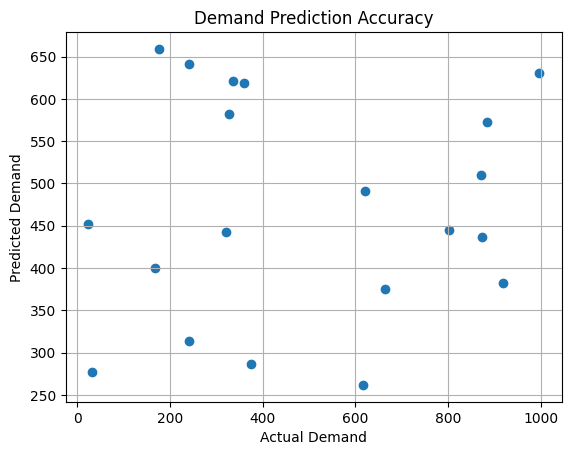

In [43]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Demand Prediction Accuracy")
plt.grid(True)
plt.show()


### RandomForestRegressor


In [48]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


In [50]:

# Label Encode categorical columns
label_cols = ["Product type", "Supplier name", "Location"]
le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    supply_chain[col] = le.fit_transform(supply_chain[col])
    le_dict[col] = le  # store encoders for later use


In [53]:
features = ["Product type", "Price", "Inventory", "Shipping_Lead_Time", "Manufacturing_Cost", "Location"]
target = "Demand"

X = supply_chain[features]
y = supply_chain[target]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [56]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 315.61
R² Score: -0.04


C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


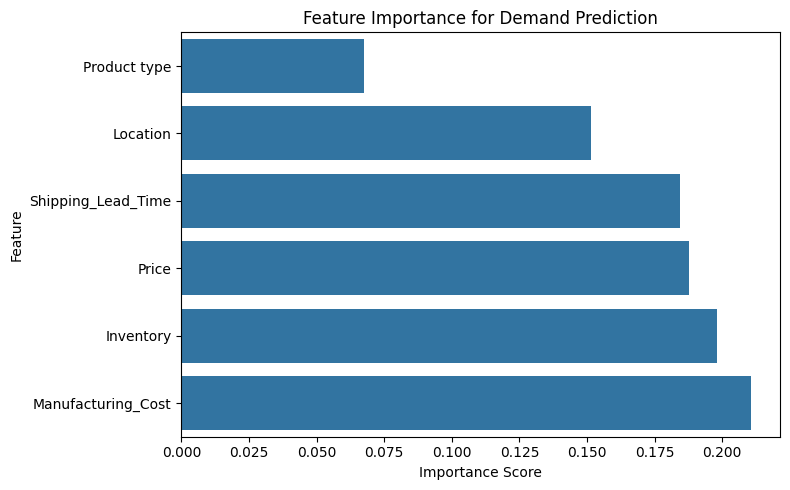

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Feature Importance for Demand Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [58]:
import joblib

# Save the trained model
joblib.dump(model, "demand_model.pkl")


['demand_model.pkl']

In [60]:
# Load the saved model
loaded_model = joblib.load("demand_model.pkl")

# Use it to make predictions
pred = loaded_model.predict(X_test)
print(pred)


[415.21 584.48 265.48 419.62 454.01 498.87 510.37 370.52 501.22 545.01
 442.02 659.13 316.18 181.42 336.22 649.4  484.39 576.87 610.81 287.21]
